In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Data_Negara_HELP.csv').sort_values(by=['Kesehatan'], ascending=False)
display(df.head(10))
display(df.tail(10))

# deteksi missing value
df.info()
df.isnull().sum()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
159,United States,7.3,12.40,17.9,15.8,49400,1.220,78.7,1.93,48400
101,"Micronesia, Fed. Sts.",40.0,23.50,14.2,81.0,3340,3.800,65.4,3.46,2860
132,Sierra Leone,160.0,16.80,13.1,34.5,1220,17.200,55.0,5.20,399
110,Netherlands,4.5,72.00,11.9,63.6,45500,0.848,80.7,1.79,50300
54,France,4.2,26.80,11.9,28.1,36900,1.050,81.4,2.03,40600
88,Liberia,89.3,19.10,11.8,92.6,700,5.470,60.8,5.02,327
102,Moldova,17.2,39.20,11.7,78.5,3910,11.100,69.7,1.27,1630
58,Germany,4.2,42.30,11.6,37.1,40400,0.758,80.1,1.39,41800
26,Burundi,93.6,8.92,11.6,39.2,764,12.300,57.7,6.26,231
145,Switzerland,4.5,64.00,11.5,53.3,55500,0.317,82.2,1.52,74600


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
23,Brunei,10.5,67.400,2.84,28.0000,80600,16.70,77.1,1.84,35300
115,Oman,11.7,65.700,2.77,41.2000,45300,15.60,76.1,2.90,19300
50,Eritrea,55.2,4.790,2.66,23.3000,1420,11.60,61.7,4.61,482
82,Kuwait,10.8,66.700,2.63,30.4000,75200,11.20,78.2,2.21,38500
70,Indonesia,33.3,24.300,2.61,22.4000,8430,15.30,69.9,2.48,3110
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.31,67.9,2.83,4440
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.70,60.4,4.95,2740
116,Pakistan,92.1,13.500,2.20,19.4000,4280,10.90,65.3,3.85,1040
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988
123,Qatar,9.0,62.300,1.81,23.8000,125000,6.98,79.5,2.07,70300


<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 159 to 123
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 14.4+ KB


Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

Dari tahap preprocessing data, tidak terdeteksi adanya missing value, sehingga data siap untuk dianalisa.

In [3]:
# mencari koefisien regresi
y = df['Kesehatan']
x = df[['Kematian_anak', 'Ekspor', 'GDPperkapita', 'Impor', 
        'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'Pendapatan']]
from sklearn import linear_model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
mlr = linear_model.LinearRegression()  
mlr.fit(x_train, y_train)
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  11.02575029546539
Coefficients:


[('Kematian_anak', -0.030395056904529708),
 ('Ekspor', -0.08091975419532667),
 ('GDPperkapita', 0.00019094837862406594),
 ('Impor', 0.07970331575486346),
 ('Inflasi', 0.007051292196071484),
 ('Harapan_hidup', -0.06382752007917648),
 ('Jumlah_fertiliti', 0.08455839176334151),
 ('Pendapatan', -9.703817346971844e-05)]

Dari hasil pencarian koefisien regresi di atas, didapatkan 2 variabel yang akan dipakai untuk dianalisa, yaitu variabel Kesehatan dan Pendapatan. Alasan mengapa memilih variabel Kesehatan karena biaya kesehatan sangat mempengaruhi suatu negara ketika terjadi bencana dan bencana alam. Sedangkan variabel Pendapatan dipilih karena berdasarkan persamaan regresi yang diperoleh, pendapatan memiliki kontribusi yang paling besar di antara variabel lain dalam model pengeluaran biaya kesehatan.

Nilai outlier pada variabel Kesehatan :
159    17.9
101    14.2
Name: Kesehatan, dtype: float64


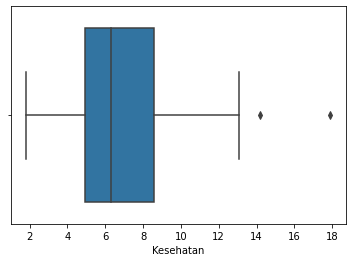

Nilai outlier pada variabel Pendapatan :
145     55500
114     62300
91      91700
133     72100
157     57600
23      80600
82      75200
123    125000
Name: Pendapatan, dtype: int64


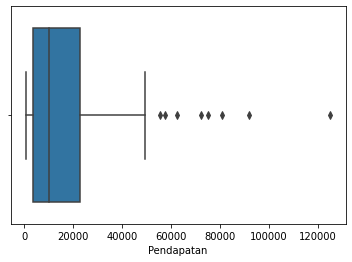

In [4]:
# Deteksi Outlier
def outlier1(df):
    q_1 = df.quantile(0.25)
    q_3 = df.quantile(0.75)
    IQR = q_3-q_1
    Batas_bawah = q_1-(1.5*IQR)
    Batas_atas = q_3+(1.5*IQR)
    return df[(df<Batas_bawah) | (df>Batas_atas)]

print('Nilai outlier pada variabel Kesehatan :')
print(outlier1(df['Kesehatan']))
sns.boxplot(x = df['Kesehatan'])
plt.show()
print('Nilai outlier pada variabel Pendapatan :')
print(outlier1(df['Pendapatan']))
sns.boxplot(x = df['Pendapatan'])
plt.show()

Berdasarkan visualisasi di atas, terdapat outlier pada data Kesehatan dan Pendapatan, sehingga dapat dilakukan handling terhadap outlier ini dengan hanya melihat data pada interquartile range

In [5]:
# Hapus Outlier
def hapus_outlier(df):
    q_1 = df.quantile(0.25)
    q_3 = df.quantile(0.75)
    IQR = q_3-q_1
    Batas_bawah = q_1-(1.5*IQR)
    Batas_atas = q_3+(1.5*IQR)
    return df[(df>Batas_bawah) & (df<Batas_atas)]
df_final = pd.concat([hapus_outlier(df[['Pendapatan']]),df[['Kesehatan']]], axis = 1)
df_final.dropna(axis=0, inplace = True)
df_final

,Pendapatan,Kesehatan
159,49400.0,17.90
101,3340.0,14.20
132,1220.0,13.10
110,45500.0,11.90
54,36900.0,11.90
...,...,...
70,8430.0,2.61
154,9940.0,2.50
38,5190.0,2.46
116,4280.0,2.20


Pair plot


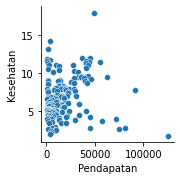

Pair plot


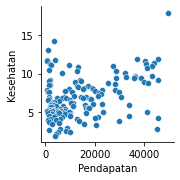

In [6]:
# cek hubungan antar variabel
print('Pair plot')
sns.pairplot(df, x_vars='Pendapatan', y_vars = 'Kesehatan')
plt.show()
print('Pair plot')
sns.pairplot(df_final, x_vars='Pendapatan', y_vars = 'Kesehatan')
plt.show()

In [7]:
# Scaling Data
sc = StandardScaler()
df_std = sc.fit_transform(df_final)

In [8]:
# Clustering dengan K-Means dengan n = 2
kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
labels1

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0])

In [9]:
# Pembentukan dataframe baru dengan data yang sudah distandarisasi
df_baru = pd.DataFrame(data = df_std, columns = ['Kesehatan', 'Pendapatan'])
df_baru['label1_kmeans'] = labels1
df_baru

,Kesehatan,Pendapatan,label1_kmeans
0,2.684938,4.104497,1
1,-0.819200,2.725888,0
2,-0.980485,2.316031,0
3,2.388235,1.868914,1
4,1.733967,1.868914,1
...,...,...,...
154,-0.431965,-1.592513,0
155,-0.317088,-1.633499,0
156,-0.678457,-1.648402,0
157,-0.747687,-1.745278,0


n_cluster = 2


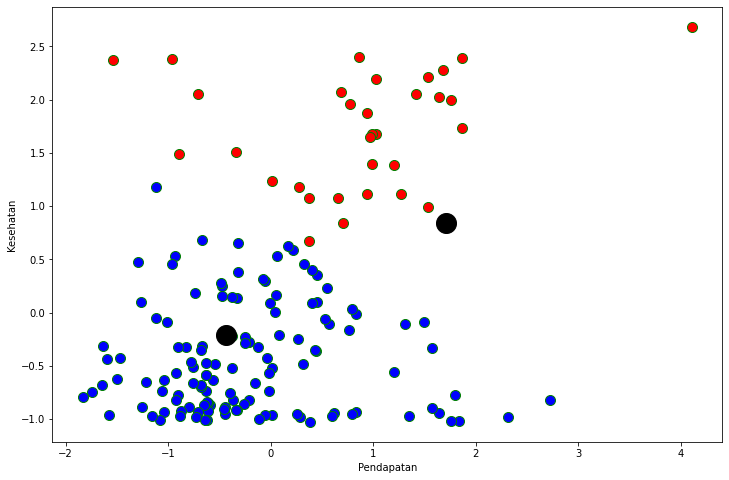

Elbow graph


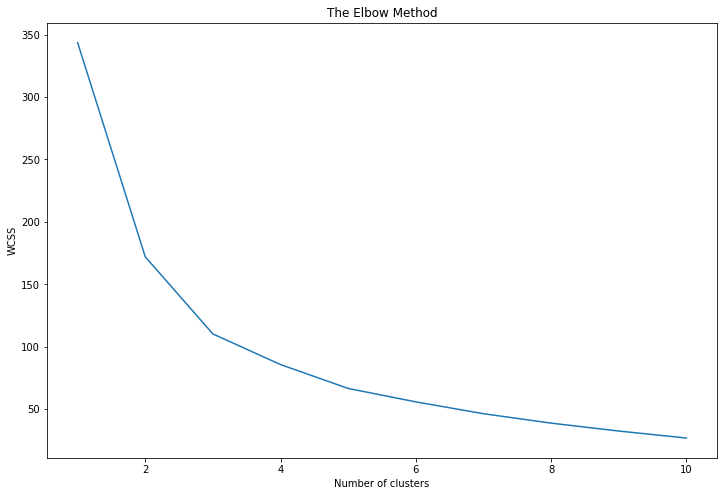

In [10]:
print('n_cluster = 2')
plt.figure(figsize=(12,8))
plt.scatter(df_baru.Pendapatan[df_baru.label1_kmeans == 0],df_baru['Kesehatan'][df_baru.label1_kmeans == 0], 
            c='blue', s = 100 , edgecolors='green'),
plt.scatter(df_baru.Pendapatan[df_baru.label1_kmeans == 1],df_baru['Kesehatan'][df_baru.label1_kmeans == 1], 
            c='red', s = 100 , edgecolors='green'),
centroid = kmeans1.cluster_centers_
plt.scatter(centroid[:, 0], centroid[:, 1], c = 'black', s = 400)
plt.xlabel('Pendapatan')
plt.ylabel('Kesehatan')
plt.show()

#Metode Elbow
print('Elbow graph')
plt.figure(figsize=(12,8))
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_baru)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

labels2_kmeans


array([1, 5, 5, 1, 1, 5, 5, 1, 5, 1, 1, 5, 5, 5, 1, 1, 5, 1, 5, 5, 1, 1,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 0, 1, 3, 3, 1, 3, 0, 0, 3, 3,
       3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3,
       2, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3,
       0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4,
       4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4,
       4, 4, 4, 4, 4])

n_cluster = 6


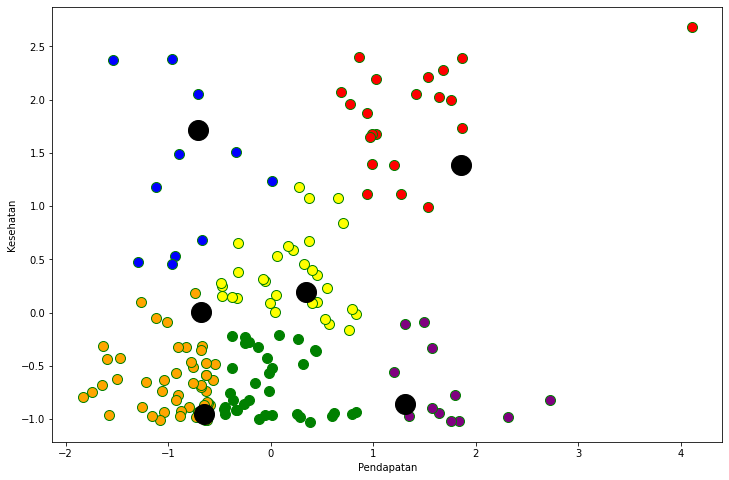

In [11]:
# Clustering dengan K-Means dengan n = 6
kmeans2 = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42).fit(df_std)
labels2 = kmeans2.labels_

df_baru['label2_kmeans'] = labels2
print('labels2_kmeans')
display(labels2)

print('n_cluster = 6')
plt.figure(figsize=(12,8))
plt.scatter(df_baru.Pendapatan[df_baru.label2_kmeans == 0],df_baru['Kesehatan'][df_baru.label2_kmeans == 0], 
            c='green', s = 100 , edgecolors='green'),
plt.scatter(df_baru.Pendapatan[df_baru.label2_kmeans == 1],df_baru['Kesehatan'][df_baru.label2_kmeans == 1], 
            c='red', s = 100 , edgecolors='green'),
plt.scatter(df_baru.Pendapatan[df_baru.label2_kmeans == 2],df_baru['Kesehatan'][df_baru.label2_kmeans == 2], 
            c='blue', s = 100 , edgecolors='green'),
plt.scatter(df_baru.Pendapatan[df_baru.label2_kmeans == 3],df_baru['Kesehatan'][df_baru.label2_kmeans == 3], 
            c='yellow', s = 100 , edgecolors='green'),
plt.scatter(df_baru.Pendapatan[df_baru.label2_kmeans == 4],df_baru['Kesehatan'][df_baru.label2_kmeans == 4], 
            c='orange', s = 100 , edgecolors='green'),
plt.scatter(df_baru.Pendapatan[df_baru.label2_kmeans == 5],df_baru['Kesehatan'][df_baru.label2_kmeans == 5], 
            c='purple', s = 100 , edgecolors='green'),
centroid2 = kmeans2.cluster_centers_
plt.scatter(centroid2[:, 0], centroid2[:, 1], c = 'black', s = 400)
plt.xlabel('Pendapatan')
plt.ylabel('Kesehatan')
plt.show()

In [12]:
# Inverse Transform
df_baru1 = pd.DataFrame(data = sc.inverse_transform(df_std), columns=['Pendapatan', 'Kesehatan'])
df_baru1['label2_kmeans'] = labels2
df_baru1

,Pendapatan,Kesehatan,label2_kmeans
0,49400.0,17.90,1
1,3340.0,14.20,5
2,1220.0,13.10,5
3,45500.0,11.90,1
4,36900.0,11.90,1
...,...,...,...
154,8430.0,2.61,4
155,9940.0,2.50,4
156,5190.0,2.46,4
157,4280.0,2.20,4


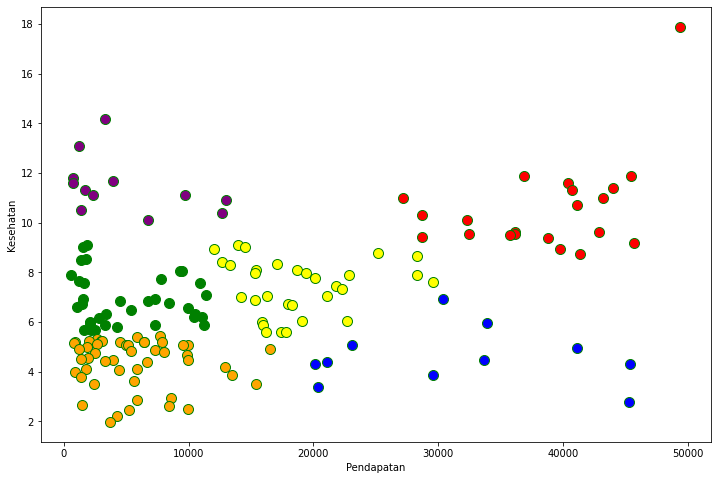

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(df_baru1.Pendapatan[df_baru1.label2_kmeans == 0],df_baru1['Kesehatan'][df_baru1.label2_kmeans == 0], 
            c='green', s = 100 , edgecolors='green'),
plt.scatter(df_baru1.Pendapatan[df_baru1.label2_kmeans == 1],df_baru1['Kesehatan'][df_baru1.label2_kmeans == 1], 
            c='red', s = 100 , edgecolors='green'),
plt.scatter(df_baru1.Pendapatan[df_baru1.label2_kmeans == 2],df_baru1['Kesehatan'][df_baru1.label2_kmeans == 2], 
            c='blue', s = 100 , edgecolors='green'),
plt.scatter(df_baru1.Pendapatan[df_baru1.label2_kmeans == 3],df_baru1['Kesehatan'][df_baru1.label2_kmeans == 3], 
            c='yellow', s = 100 , edgecolors='green'),
plt.scatter(df_baru1.Pendapatan[df_baru1.label2_kmeans == 4],df_baru1['Kesehatan'][df_baru1.label2_kmeans == 4], 
            c='orange', s = 100 , edgecolors='green'),
plt.scatter(df_baru1.Pendapatan[df_baru1.label2_kmeans == 5],df_baru1['Kesehatan'][df_baru1.label2_kmeans == 5], 
            c='purple', s = 100 , edgecolors='green'),
centroid2 = kmeans2.cluster_centers_

plt.xlabel('Pendapatan')
plt.ylabel('Kesehatan')
plt.show()

In [14]:
# Memasukkan label cluster ke data utama
df3 = pd.merge(df,df_baru1, how='outer')

df3['label2_kmeans'] = df3['label2_kmeans'].astype('object')
df_hasil = df3.dropna()
df_hasil

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label2_kmeans
0,United States,7.3,12.40,17.90,15.8,49400.0,1.220,78.7,1.93,48400.0,1.0
1,"Micronesia, Fed. Sts.",40.0,23.50,14.20,81.0,3340.0,3.800,65.4,3.46,2860.0,5.0
3,Netherlands,4.5,72.00,11.90,63.6,45500.0,0.848,80.7,1.79,50300.0,1.0
4,France,4.2,26.80,11.90,28.1,36900.0,1.050,81.4,2.03,40600.0,1.0
6,Moldova,17.2,39.20,11.70,78.5,3910.0,11.100,69.7,1.27,1630.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
155,Sri Lanka,11.2,19.60,2.94,26.8,8560.0,22.800,74.4,2.20,2810.0,4.0
159,Eritrea,55.2,4.79,2.66,23.3,1420.0,11.600,61.7,4.61,482.0,4.0
162,Turkmenistan,62.0,76.30,2.50,44.5,9940.0,2.310,67.9,2.83,4440.0,4.0
163,"Congo, Rep.",63.9,85.10,2.46,54.7,5190.0,20.700,60.4,4.95,2740.0,4.0


In [15]:
negara_rekomendasi = df_hasil[df_hasil['label2_kmeans']==5]
negara_rekomendasi['Negara']

1      Micronesia, Fed. Sts.
6                    Moldova
8                    Burundi
12                  Kiribati
13                   Lesotho
14    Bosnia and Herzegovina
17                Costa Rica
19                    Rwanda
20                    Serbia
23                   Georgia
Name: Negara, dtype: object